In [4]:
#All the libraries needed throughout the exercises
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import scipy
import urllib
import plotly.graph_objects as go

%matplotlib inline
sns.set() # Set searborn as default

In [34]:
data1 = pd.read_csv("WEO_Data_Euro.csv", encoding = "ISO-8859-1")
data2 = pd.read_csv("WEO_Data_Poor.csv", encoding = "ISO-8859-1")
data3 = pd.read_csv("WEO_Data_others.csv", encoding = "ISO-8859-1")

In [6]:
frames = [data1, data2, data3]

In [7]:
bigData = pd.concat(frames)
bigData.to_csv("completeData.csv")

In [8]:
countryList = list(bigData.Country.unique())
countryList.pop(19)
countryList.pop(19)
countryList.sort()
years = list(bigData.columns[5:27])
subjects = list(bigData["Subject Descriptor"].unique())
subjects = subjects[0:8]
interestedsubjects = [subjects[2],subjects[3],subjects[5]]

In [9]:
#function to generate figures
def New_figure(country, subject, years):

    visible = "legendonly"
    fig.add_trace(
    go.Scatter(name=country,
               x=years,
               y=list(bigData[(bigData["Country"] == country) & (bigData["Subject Descriptor"].str.contains(subject, regex=False))].iloc[0][5:27]),
               visible=visible))
    
#create masks for subject visibility in the plot
mask1 = []
mask2 = []
mask3 = []
for i in range (0,len(interestedsubjects)):
    for j in range (0,len(countryList)):
        if i == 0:
            mask1.append(True)
            mask2.append(False)
            mask3.append(False)
        if i == 1:
            mask1.append(False)
            mask2.append(True)
            mask3.append(False)
        if i == 2:
            mask1.append(False)
            mask2.append(False)
            mask3.append(True)

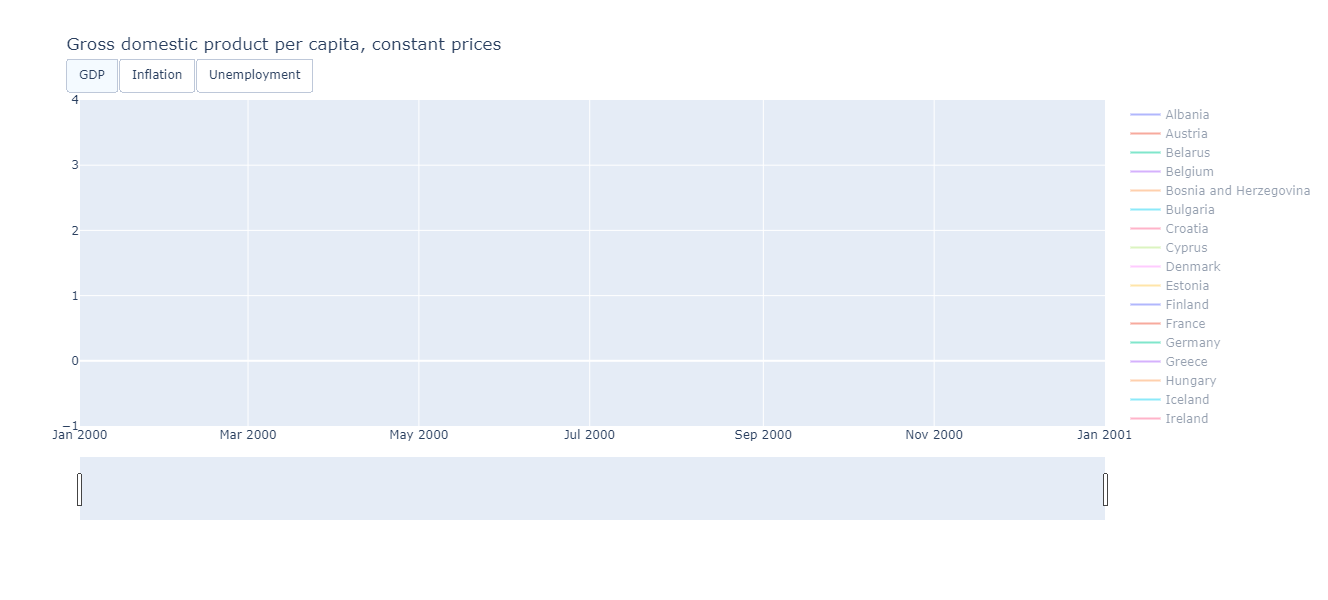

In [62]:
# Create figure
fig = go.Figure()

visibility = []
for j in interestedsubjects:
    for i in countryList:
        New_figure(i,j,years)


# Set title
fig.update_layout(
    title_text=interestedsubjects[0],
    height=600,
    hovermode = 'x'
    )

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(),
        rangeslider=dict(
            visible=True),
        type="date"
    )
)
# add buttons for subjects
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.226,
            y=1.13,
            buttons=list([
                dict(label="GDP",
                     method="update",
                     args=[{"visible": mask1},
                           {"title": interestedsubjects[0]}]),
                dict(label="Inflation",
                     method="update",
                     args=[{"visible": mask2},
                           {"title": interestedsubjects[1]}]),
                dict(label="Unemployment",
                     method="update",
                     args=[{"visible": mask3},
                           {"title": interestedsubjects[2]}]),
            ]),
        )
    ])

fig.show()

# Other Plots

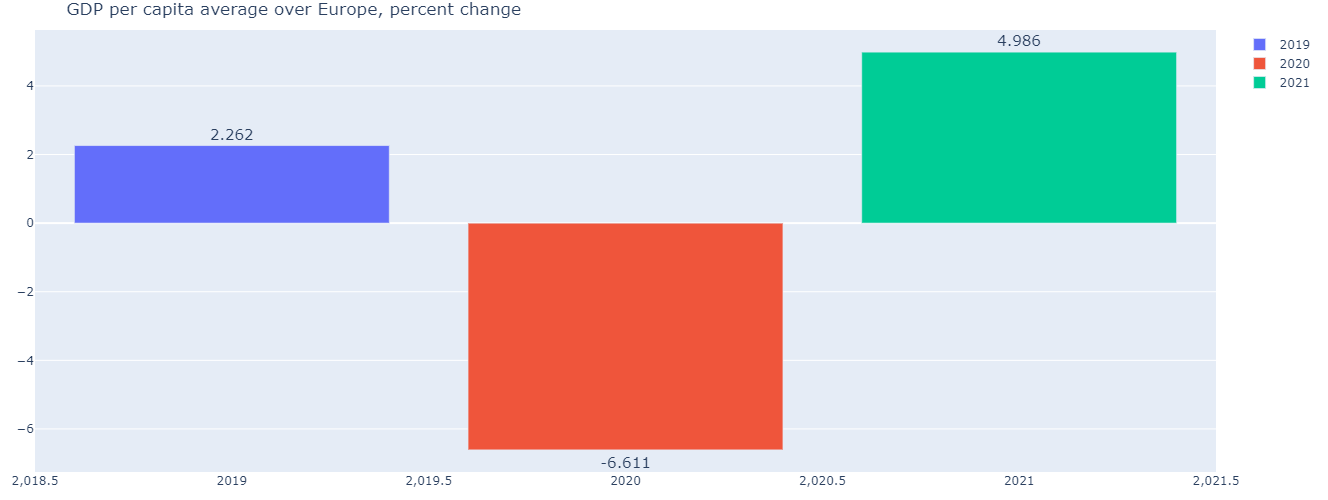

In [63]:
#plot for average all over europe for 2019,2020,2021
import plotly.graph_objects as go
import plotly.figure_factory as ff

bigData = bigData.dropna(subset=["Subject Descriptor"])

fig2 = go.Figure()


fig2.add_trace(
    go.Bar(name="2019",
           x=["2019"],
           y=[pd.to_numeric(bigData["2019"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           text = [pd.to_numeric(bigData["2019"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           textposition='outside'
          )
)

fig2.add_trace(
    go.Bar(name="2020",
           x=["2020"],
           y=[pd.to_numeric(bigData["2020"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           text = [pd.to_numeric(bigData["2020"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           textposition='outside'
          )
)

fig2.add_trace(
    go.Bar(name="2021",
           x=["2021"],
           y=[pd.to_numeric(bigData["2021"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           text = [pd.to_numeric(bigData["2021"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           textposition='outside'
          )
)

fig2.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig2.update_layout(uniformtext_minsize=15, uniformtext_mode='hide')

fig2.update_layout(
    title_text="GDP per capita average over Europe, percent change",
    width= 500,
    height=500,
    hovermode = 'x',
    margin=dict(l=20, r=20, t=30, b=20)
    )


fig2.show()

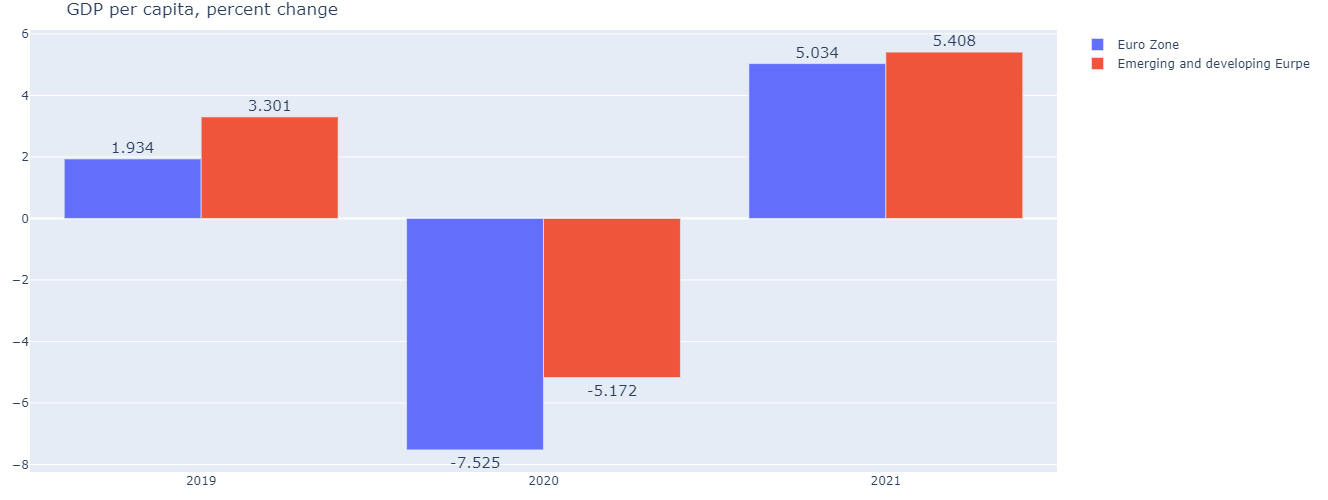

In [64]:
#plot for average all over europe for 2019,2020,2021
import plotly.graph_objects as go
import plotly.figure_factory as ff

data1 = data1.dropna(subset=["Subject Descriptor"])
data2 = data2.dropna(subset=["Subject Descriptor"])
fig3 = go.Figure()


fig3.add_trace(
    go.Bar(name="Euro Zone",
           x=["2019","2020","2021"],
           y=[pd.to_numeric(data1["2019"][data1["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(data1["2020"][data1["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(data1["2021"][data1["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           
           text = [pd.to_numeric(data1["2019"][data1["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(data1["2020"][data1["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(data1["2021"][data1["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           textposition='outside'
          )
)

fig3.add_trace(
    go.Bar(name="Emerging and developing Eurpe",
           x=["2019","2020","2021"],
           y=[pd.to_numeric(data2["2019"][data2["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(data2["2020"][data2["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(data2["2021"][data2["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           
           text = [pd.to_numeric(data2["2019"][data2["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(data2["2020"][data2["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(data2["2021"][data2["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           textposition='outside'
          )
)

fig3.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig3.update_layout(uniformtext_minsize=15, uniformtext_mode='hide')

fig3.update_layout(
    title_text="GDP per capita, percent change",
    width= 800,
    height=500,
    hovermode = 'x',
    margin=dict(l=20, r=20, t=30, b=20)
    )


fig3.show()

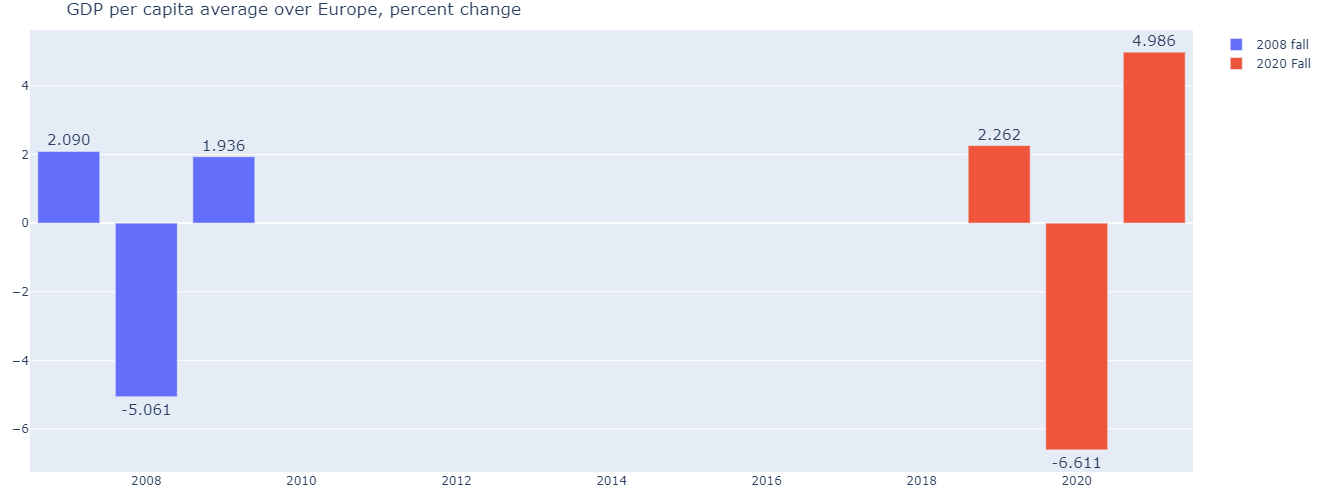

In [65]:
#plot for average all over europe for 2019,2020,2021
import plotly.graph_objects as go
import plotly.figure_factory as ff

bigData = bigData.dropna(subset=["Subject Descriptor"])

fig4 = go.Figure()



fig4.add_trace(
    go.Bar(name="2008 fall",
           x=["2007","2008","2009"],
           y=[pd.to_numeric(bigData["2008"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(bigData["2009"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(bigData["2010"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           
           text = [pd.to_numeric(bigData["2008"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(bigData["2009"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(bigData["2010"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           textposition='outside'
          )
)

fig4.add_trace(
    go.Bar(name="2020 Fall",
           x=["2019","2020","2021"],
           y=[pd.to_numeric(bigData["2019"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(bigData["2020"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(bigData["2021"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           
           text = [pd.to_numeric(bigData["2019"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(bigData["2020"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean(),
             pd.to_numeric(bigData["2021"][bigData["Subject Descriptor"].str.contains("domestic product per capita", regex=False)], errors='coerce').mean()],
           textposition='outside'
          )
)

fig4.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig4.update_layout(uniformtext_minsize=15, uniformtext_mode='hide')

fig4.update_layout(
    title_text="GDP per capita average over Europe, percent change",
    width= 1200,
    height=500,
    hovermode = 'x',
    margin=dict(l=20, r=20, t=30, b=20)
    )


fig4.show()

![alt text](https://moriohcdn.b-cdn.net/ff3cc511fb.png)

In [69]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>